     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     -------- ------------------------------- 10.2/48.7 kB ? eta -:--:--
     ----------------------- -------------- 30.7/48.7 kB 435.7 kB/s eta 0:00:01
     ----------------------- -------------- 30.7/48.7 kB 435.7 kB/s eta 0:00:01
     ----------------------- -------------- 30.7/48.7 kB 435.7 kB/s eta 0:00:01
     ----------------------- -------------- 30.7/48.7 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 144.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/385.2 MB 812.7 kB/s eta 0:07:54
   ---------------------------------------- 0.1/385.2 MB 744.7 kB/s eta 0:08:38
   ---------------------------------------- 0.1/385.2 MB 744.7 kB/s eta 0:08:38
 

C:\Users\Deepawali.Sharma\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 16ms/step - accuracy: 0.8923 - loss: 0.3349 - val_accuracy: 0.9809 - val_loss: 0.0599
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9862 - loss: 0.0463 - val_accuracy: 0.9893 - val_loss: 0.0315
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9897 - loss: 0.0318 - val_accuracy: 0.9868 - val_loss: 0.0357
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9923 - loss: 0.0236 - val_accuracy: 0.9886 - val_loss: 0.0356
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9940 - loss: 0.0191 - val_accuracy: 0.9891 - val_loss: 0.0363
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9854 - loss: 0.0477
Test accuracy: 0.9890999794006348


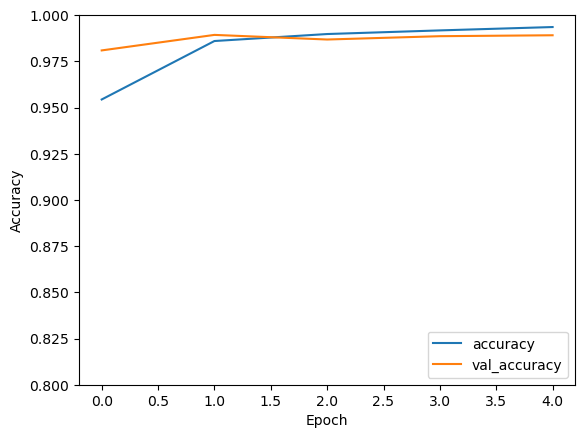

In [3]:
!pip install tensorflow

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convert labels to categorical one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Build the CNN model
model = models.Sequential()

# Add convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the layers and add dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.show()

# Save the model
model.save('cnn_mnist_model.h5')


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 15ms/step - accuracy: 0.8805 - loss: 0.3779 - val_accuracy: 0.9846 - val_loss: 0.0515
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9841 - loss: 0.0515 - val_accuracy: 0.9892 - val_loss: 0.0368
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 16ms/step - accuracy: 0.9890 - loss: 0.0364 - val_accuracy: 0.9887 - val_loss: 0.0337
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.9927 - loss: 0.0241 - val_accuracy: 0.9893 - val_loss: 0.0337
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9945 - loss: 0.0184 - val_accuracy: 0.9922 - val_loss: 0.0274
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9899 - loss: 0.0352
Test accuracy: 0.9922000169754028


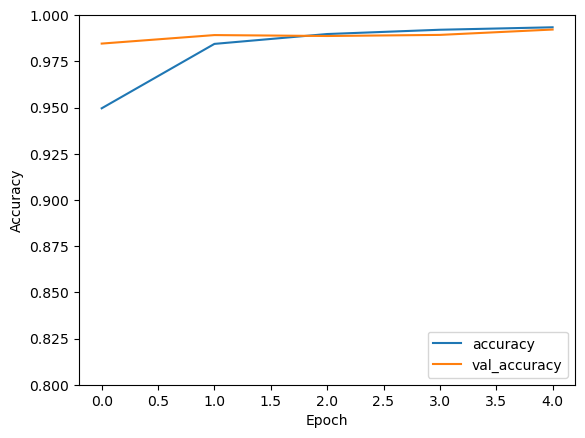

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convert labels to categorical one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Build the CNN model
model = models.Sequential()

# Add convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the layers and add dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.show()

# Save the model
model.save('cnn_mnist_model.h5')

In [7]:
from sklearn.metrics import classification_report
import numpy as np

# Get predictions for the test set
y_pred = model.predict(test_images)

# Convert one-hot encoded predictions and true labels back to label indices
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)

# Generate the classification report
report = classification_report(y_true, y_pred_classes, target_names=[str(i) for i in range(10)], output_dict=True)

# Print the classification report
print("Precision, Recall, and F1-Score per class:")
print(report)

# For specific metrics: precision, recall, and F1-score (macro and weighted averages)
precision_macro = report['macro avg']['precision']
recall_macro = report['macro avg']['recall']
f1_macro = report['macro avg']['f1-score']

precision_weighted = report['weighted avg']['precision']
recall_weighted = report['weighted avg']['recall']
f1_weighted = report['weighted avg']['f1-score']

print(f"\nMacro-averaged metrics:")
print(f"Precision: {precision_macro:.4f}")
print(f"Recall: {recall_macro:.4f}")
print(f"F1-Score: {f1_macro:.4f}")

print(f"\nWeighted-averaged metrics:")
print(f"Precision: {precision_weighted:.4f}")
print(f"Recall: {recall_weighted:.4f}")
print(f"F1-Score: {f1_weighted:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Precision, Recall, and F1-Score per class:
{'0': {'precision': 0.9918864097363083, 'recall': 0.9979591836734694, 'f1-score': 0.9949135300101729, 'support': 980.0}, '1': {'precision': 0.9964788732394366, 'recall': 0.9973568281938326, 'f1-score': 0.9969176574196389, 'support': 1135.0}, '2': {'precision': 0.9874517374517374, 'recall': 0.9912790697674418, 'f1-score': 0.9893617021276596, 'support': 1032.0}, '3': {'precision': 0.9872298624754421, 'recall': 0.995049504950495, 'f1-score': 0.9911242603550295, 'support': 1010.0}, '4': {'precision': 0.9949031600407747, 'recall': 0.9938900203665988, 'f1-score': 0.9943963321446765, 'support': 982.0}, '5': {'precision': 0.9921612541993281, 'recall': 0.9932735426008968, 'f1-score': 0.9927170868347339, 'support': 892.0}, '6': {'precision': 0.9968454258675079, 'recall': 0.9895615866388309, 'f1-score': 0.9931901519119958, 'support': 958.0}, '7': {'precision': 0.9941060903732809, 'recall': 0.9844357976653697, 'f1